In [4]:
import datetime

import pandas as pd
import json
import numpy as np
import pylab

import matplotlib.pyplot as plt

fr_filename='C:/Users/Robin/Dropbox/Travaux_&_Rapports_Stages/UbicomLab-GATech/MeToo/code/data/#balancetonporc/tweet_fr.json'
df_fr = pd.read_json(fr_filename, orient="columns")


en_filename = 'C:/Users/Robin/Dropbox/Travaux_&_Rapports_Stages/UbicomLab-GATech/MeToo/code/data/#metoo/tweet_en.json'
df_en = pd.read_json(en_filename, orient="columns")



In [194]:
print(len(df_en))

151153


# Basic statistics and distributions

In [188]:
def distribution(df,column,titre,xlim,ylim): #trace la distribution du colone de dataframe
    N=[]
    I=[]
    for i in range(xlim):
        I.append(i)
        N.append(len(df[df[column]==i]))
    fig1 = plt.figure(figsize = (30, 10))
    x = I
    height = N
    width = 0.5
    plt.tight_layout() #ajustement des etiquttes
    
     #fisrt graph
    plt.bar(x, height, width, color='b')
    plt.ylim(0,ylim)
    plt.xlim(0,xlim)
    plt.title(titre)
    plt.show()
    return(N,I)

def tweet_by_user(tweet_df) : #give back a data frame with the number of tweet for each user /!\ very heavy !!
    DU=[]
    U=[]
    I=[]
    nb_user=len(tweet_df['fullname'].value_counts())
    df=tweet_df['fullname'].value_counts().sort_values(ascending=False)
    for i in range(nb_user):
        DU.append(df.iloc[i])
        U.append(df.index[i])
        I.append(i)
    d = {'fullname': U, 'nb_tweet': DU}
    df_user = pd.DataFrame(data=d)
    ####
    fig1 = plt.figure(figsize = (30, 10))
    ax = fig1.add_subplot(111)
    
    x = I
    height = DU
    width = 0.5
    plt.tight_layout() #ajustement des etiquttes
    
     #fisrt graph
    plt.bar(x, height, width, color='b')
    
    ax.set_xticklabels(U)
    plt.ylim(0,300)
    plt.xlim(0,100)
    plt.title('user repartition')
    plt.show()
    return(df_user)

def basic_statistic(tweet_df):
    
    # Number of tweets
    nb_tweet=len(tweet_df.index)
    
    print('the campaign is composed of',nb_tweet,'tweets')
    print('\n')
    
    # Number of users involved in the campaign
    nb_users=len(tweet_df['fullname'].value_counts())
    
    print('This Tweets are coming from ',nb_users,'different users')
    print('\n')
    # top users
    print('The top-10 users are :','\n')
    for i in range(10):
        print(tweet_df['fullname'].iloc[i], ' with ', tweet_df['fullname'].value_counts().iloc[i],'tweets')
    print('\n')
    # tweet:
    mean_nb_tweet=round(tweet_df['fullname'].value_counts().mean(),2)
    std_nb_tweet=round(tweet_df['fullname'].value_counts().std(),2)
    med_nb_tweet=round(tweet_df['fullname'].value_counts().median(),2)
    
    print('The average number of tweet by user is :',mean_nb_tweet)
    print('The standard deviation of the number of tweets by user is :',std_nb_tweet)
    print('The  median of the number of tweets by user is :',)
    print('\n')
    
    # Retweets
    nb_retweet=sum(tweet_df['retweets'])/nb_tweet*100
    nb_tweet_retweeted=len(tweet_df[tweet_df['retweets']>1]) /nb_tweet*100
    med_retweet=round(tweet_df['retweets'].mean(),2)
    
    print('The number of retweets involved in this campaign is',nb_retweet)
    print('Among the',nb_tweet,'tweets involved in the campaign,',nb_tweet_retweeted,'were retweeted at least one time')
    print('Each tweets was retweeted on average(Mean) of:',  med_retweet,'times', '\n')
    
    print('\n')
    tweet_df = tweet_df.sort_values(by='retweets', ascending=False)
    tweet_df = tweet_df.reset_index(drop=True)
   
    print('Top 5 Retweeted tweets:')
    print('------------------')
    for i in range(5):
        print(tweet_df['text'].iloc[i], '-', tweet_df['retweets'].iloc[i],'retweets')
    print('\n')
    # Likes
    nb_like=sum(tweet_df['likes'])/nb_tweet*100
    nb_tweet_liked=len(tweet_df[tweet_df['likes']>1])/nb_tweet*100
    mean_like=round(tweet_df['likes'].mean(),2)
    print('The number of likes involved in this campaign is',nb_like)
    print('Among the',nb_tweet,'tweets involved in the campaign,',nb_tweet_liked,'were liked at least one time')
    print('\n')
    tweet_df = tweet_df.sort_values(by='likes', ascending=False)
    tweet_df = tweet_df.reset_index(drop=True)
    print('Each tweets was liked on average(Mean) of:',mean_like ,'times', '\n')
    print('Top 5 liked tweets:')
    print('-------------------')
    for i in range(5):
        print(tweet_df['text'].iloc[i], '-', tweet_df['likes'].iloc[i],'likes')
    print('\n')

    I=['nb_tweet','nb_users','mean_nb_tweet','std_nb_tweet','med_nb_tweet','nb_retweet','nb_tweet_retweeted','nb_like','nb_tweet_liked','mean_like']
    BS=[nb_tweet,nb_users,mean_nb_tweet,std_nb_tweet,med_nb_tweet,nb_retweet,nb_tweet_retweeted,nb_like,nb_tweet_liked,mean_like]
    
    return(BS,I)

def compare_stat(S1,name1,S2,name2,I):
    d = {name1 : S1, name2 : S2}
    df= pd.DataFrame(index=I,data=d)
    df.to_excel('compare_stat.xlsx')
    return(df)

In [174]:
Sfr,I=basic_statistic(df_fr)
Sen,I=basic_statistic(df_en)
df_c=compare_stat(Sfr,'tweet_fr',Sen,'tweet_en',I)

the campaign is composed of 71339 tweets


This Tweets are coming from  34664 different users


The top-10 users are : 

Sandra Muller  with  130 tweets
MeToo  with  112 tweets
L'inconnue  ☕️ ✊  with  107 tweets
albator le corsaire  with  94 tweets
Malice  💪  with  92 tweets
Mélisa  with  88 tweets
Nicolas Drouet  with  87 tweets
David Abiker  with  85 tweets
Stormbringer  with  84 tweets
Pierre-Jérôme Adjedj  with  83 tweets


The average number of tweet by user is : 2.06
The standard deviation of the number of tweets by user is : 3.58
The  median of the number of tweets by user is :


The number of retweets involved in this campaign is 529.439717406
Among the 71339 tweets involved in the campaign, 15.350649714742287 were retweeted at least one time
Each tweets was retweeted on average(Mean) of: 5.29 times 



Top 5 Retweeted tweets:
------------------
 un homme marchait derrière moi  m’a mit la main entre les jambes  fois et m’a sorti  ça vous plait    j’ai porté plainte   - 20677 re

In [32]:
df_c

,tweet_en,tweet_fr
nb_tweet,204271.000000,64232.000000
nb_users,119884.000000,31633.000000
mean_nb_tweet,1.700000,2.030000
std_nb_tweet,4.430000,3.390000
med_nb_tweet,1.000000,1.000000
nb_retweet,244.977995,580.165650
nb_tweet_retweeted,11.435789,16.021609
nb_like,604.406891,809.257068
nb_tweet_liked,26.208811,30.450554
mean_like,6.040000,8.090000


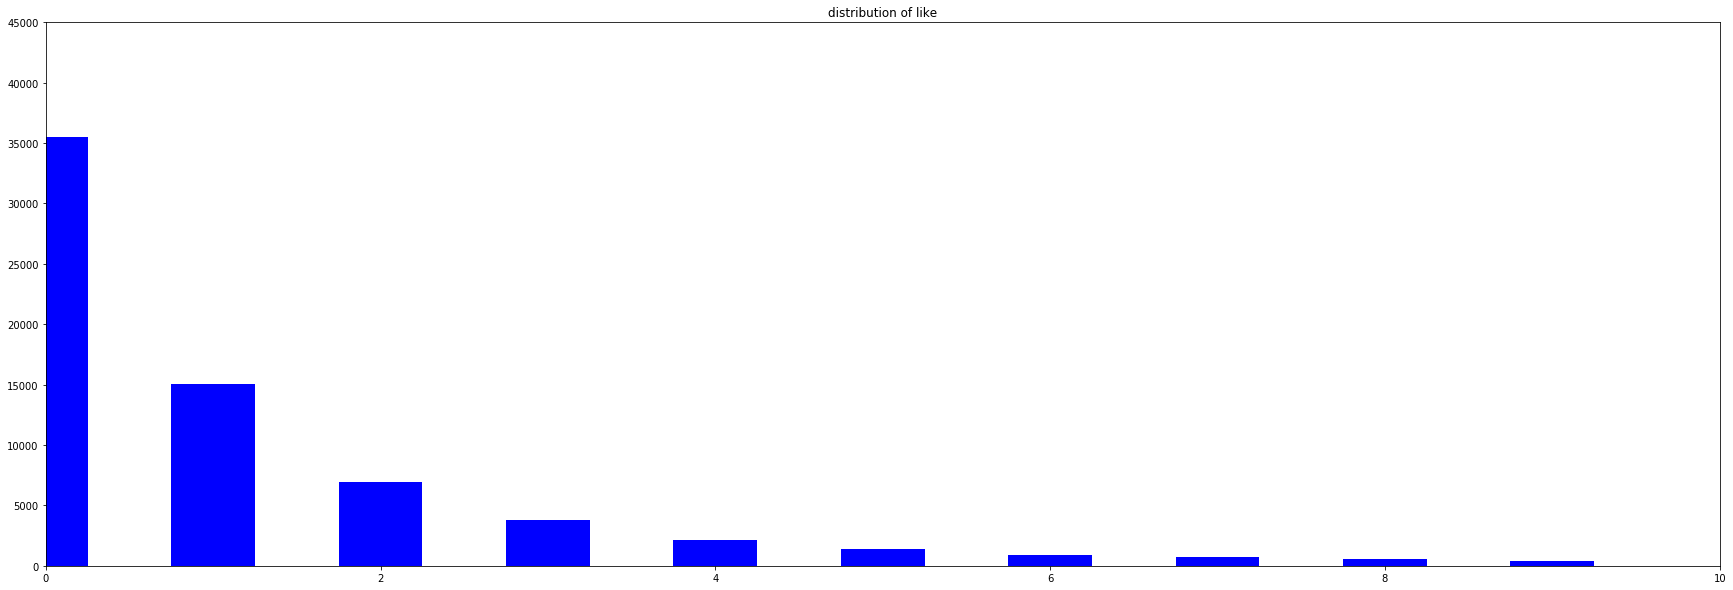

([35509, 15019, 6940, 3754, 2113, 1409, 934, 738, 528, 393], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


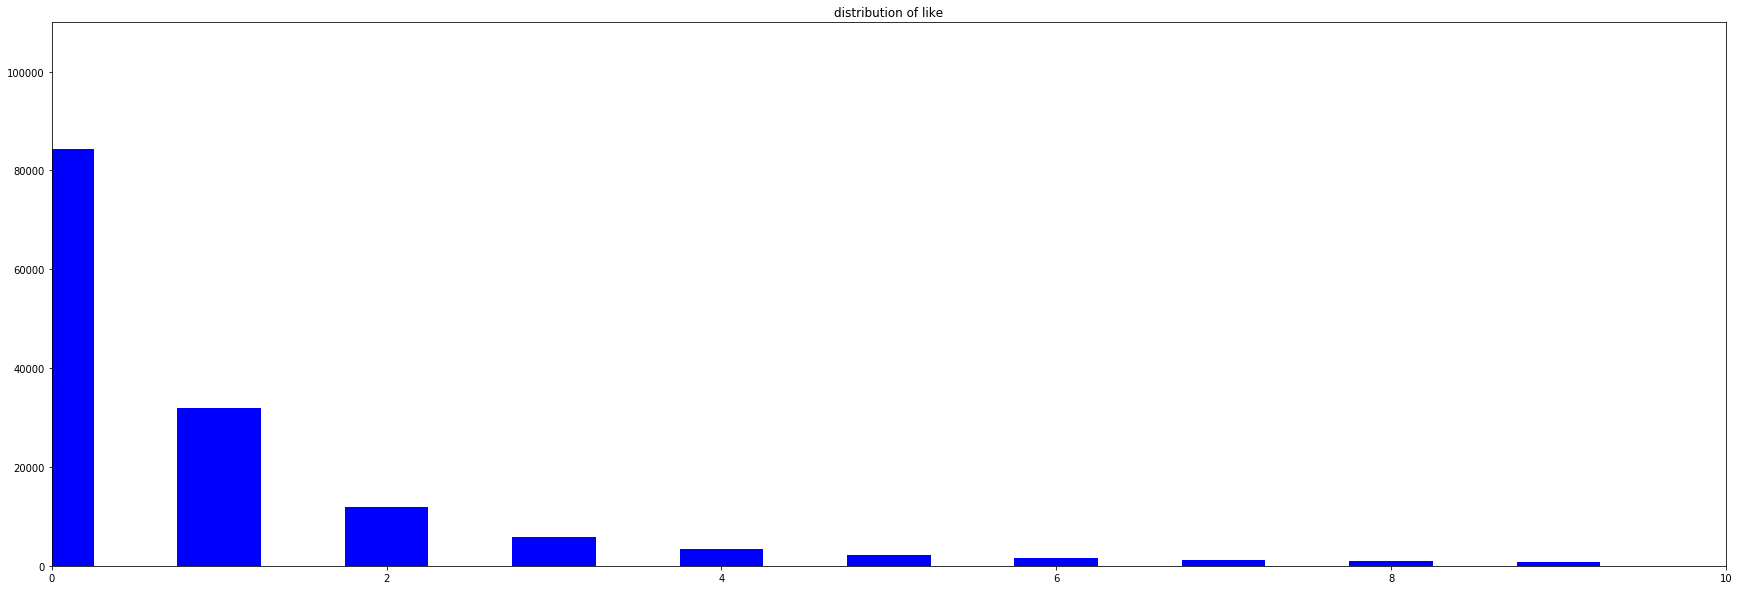

([84245, 31998, 11897, 5925, 3411, 2236, 1605, 1267, 899, 729], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


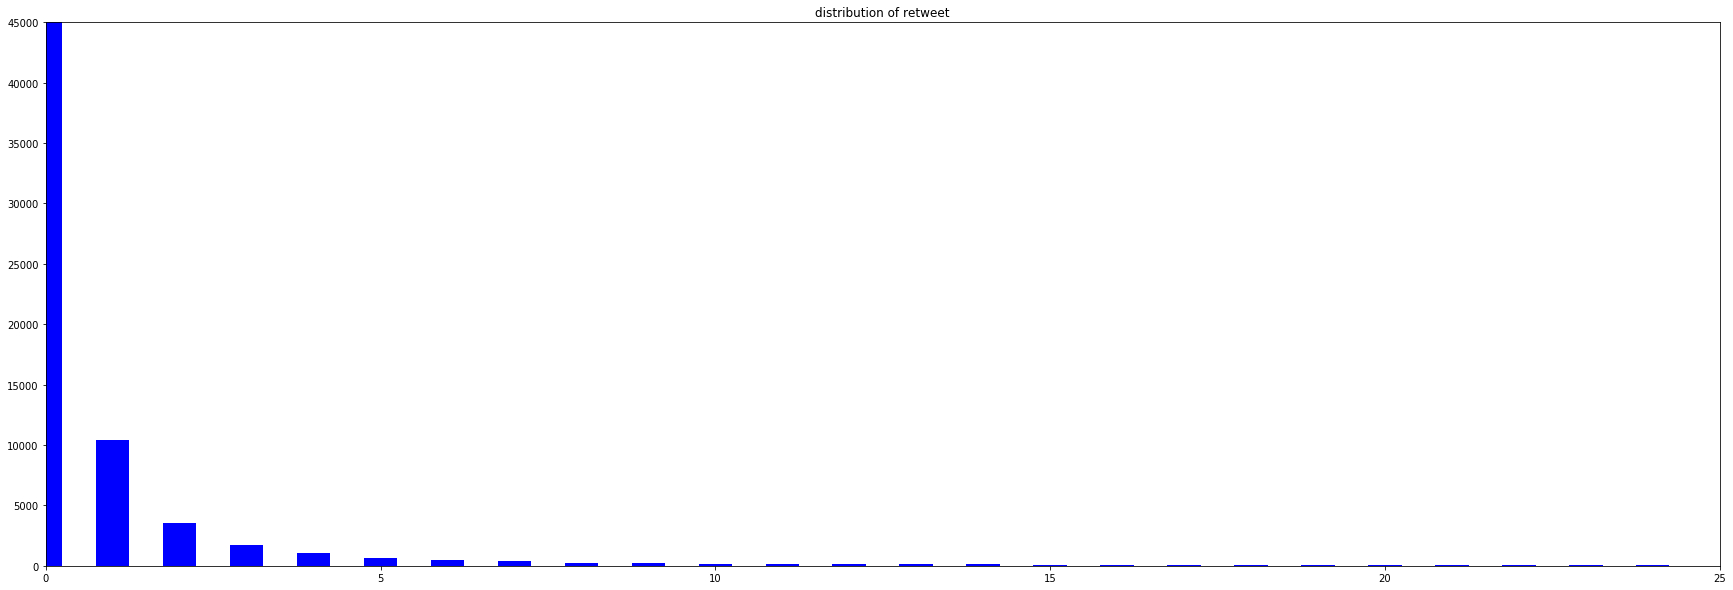

([49952, 10436, 3540, 1687, 1076, 668, 489, 381, 268, 224, 185, 138, 138, 131, 108, 85, 93, 84, 74, 64, 60, 53, 51, 49, 35], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])


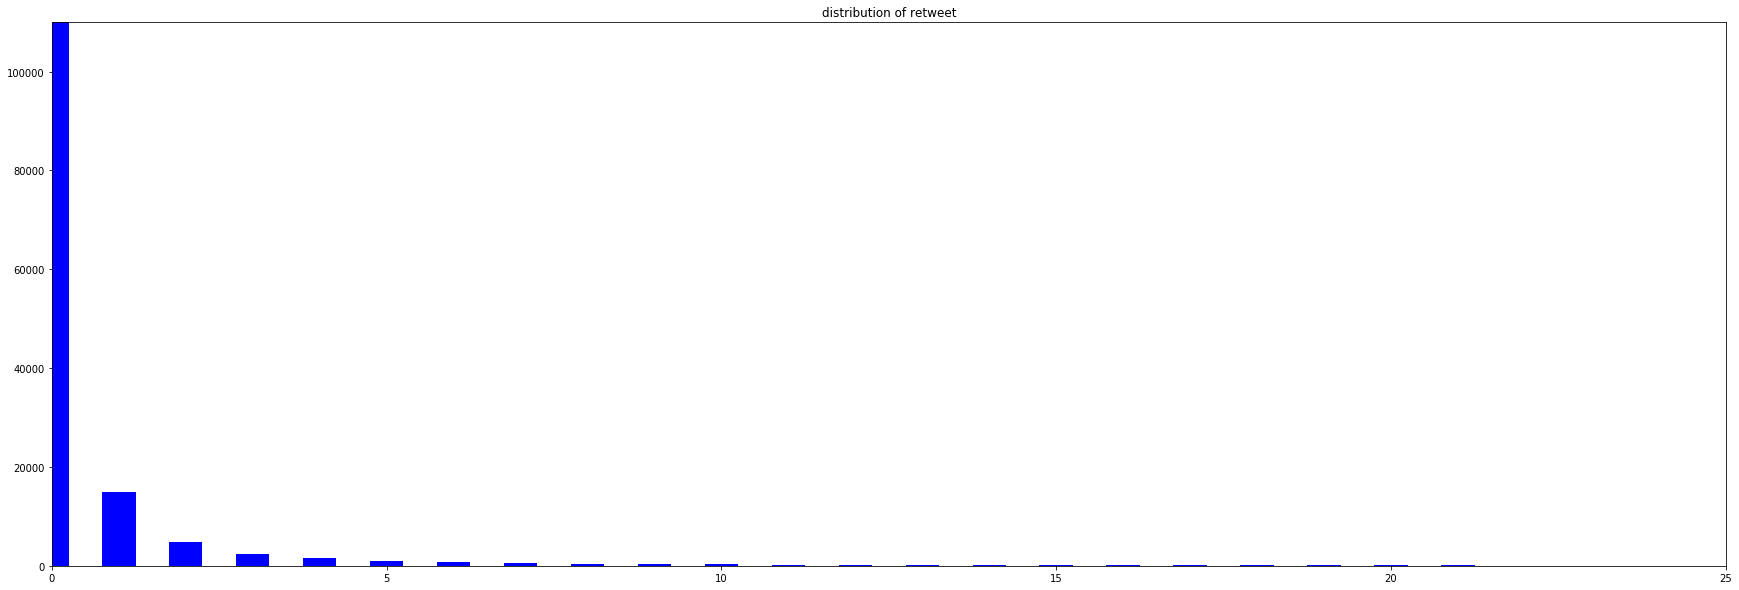

([121304, 14900, 4842, 2435, 1489, 906, 678, 526, 439, 331, 278, 215, 189, 159, 138, 127, 135, 105, 90, 87, 86, 80, 55, 52, 53], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])


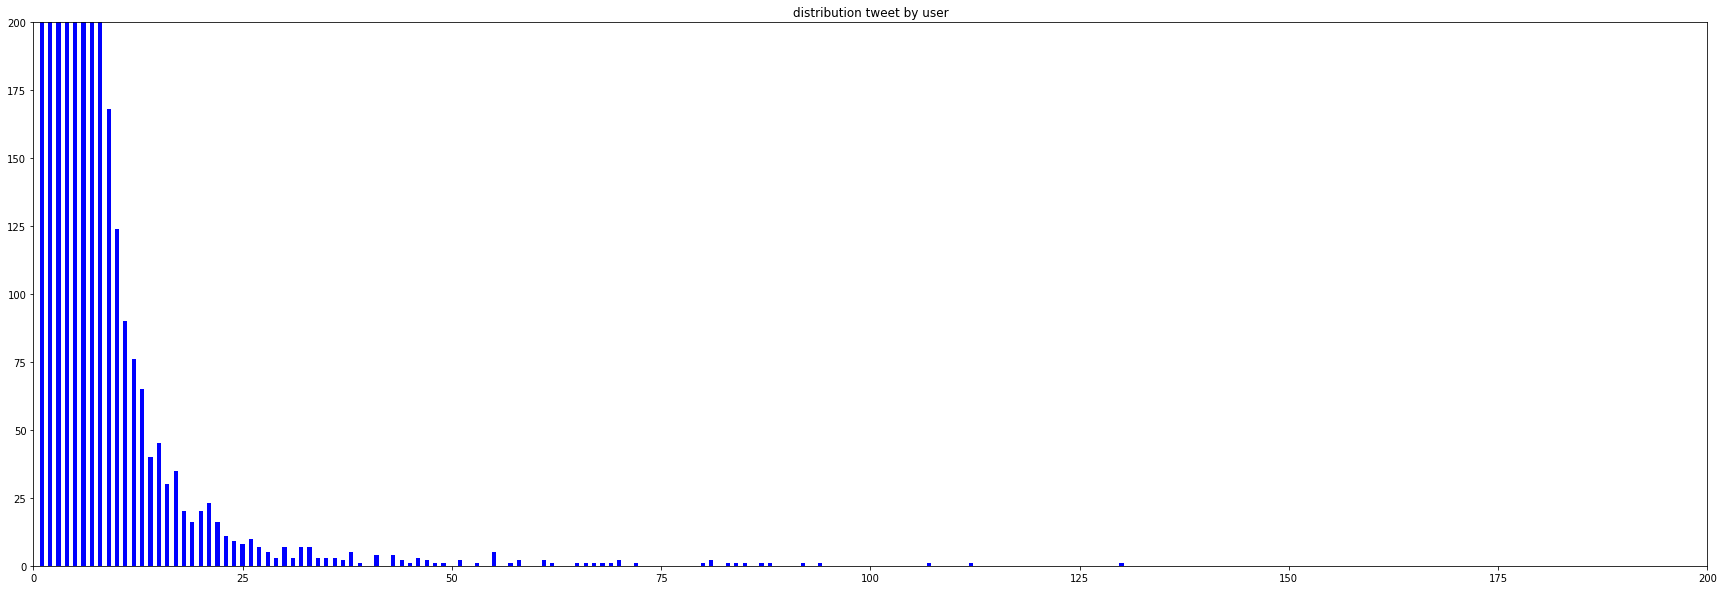

([0, 23293, 5324, 2240, 1217, 721, 445, 302, 207, 168, 124, 90, 76, 65, 40, 45, 30, 35, 20, 16, 20, 23, 16, 11, 9, 8, 10, 7, 5, 3, 7, 3, 7, 7, 3, 3, 3, 2, 5, 1, 0, 4, 0, 4, 2, 1, 3, 2, 1, 1, 0, 2, 0, 1, 0, 5, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,

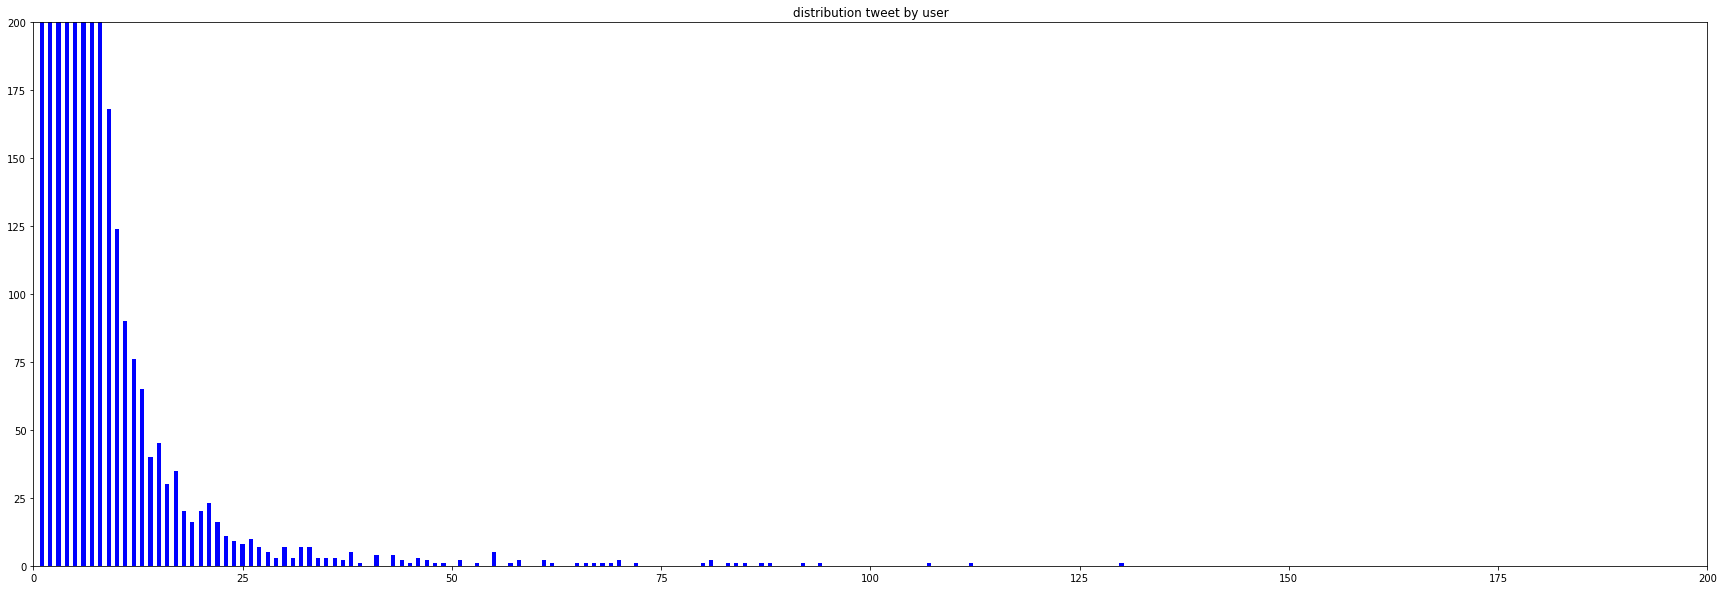

([0, 23293, 5324, 2240, 1217, 721, 445, 302, 207, 168, 124, 90, 76, 65, 40, 45, 30, 35, 20, 16, 20, 23, 16, 11, 9, 8, 10, 7, 5, 3, 7, 3, 7, 7, 3, 3, 3, 2, 5, 1, 0, 4, 0, 4, 2, 1, 3, 2, 1, 1, 0, 2, 0, 1, 0, 5, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,

In [183]:
print(distribution(df_fr,'likes','distribution of like',10,45000))
print(distribution(df_en,'likes','distribution of like',10,110000))

print(distribution(df_fr,'retweets','distribution of retweet',25,45000))
print(distribution(df_en,'retweets','distribution of retweet',25,110000))




In [179]:
df_test=df_fr['fullname'].value_counts().sort_values(ascending=False)
df_test.index[0]

'MINOU CHRYS-TAYL'

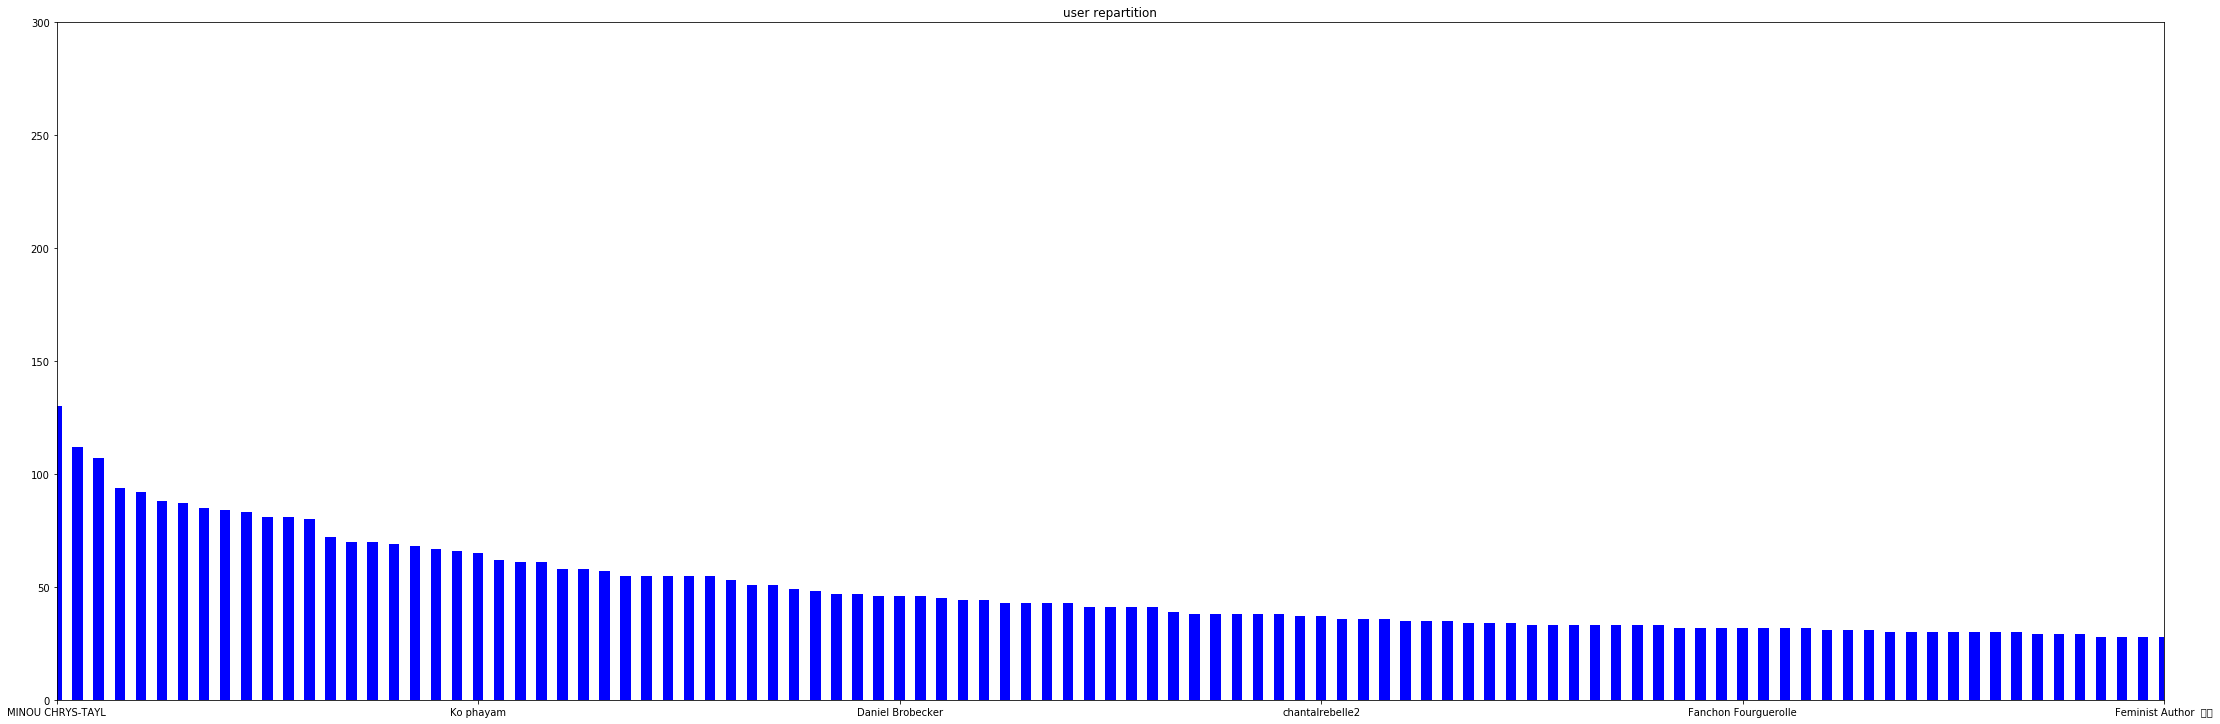

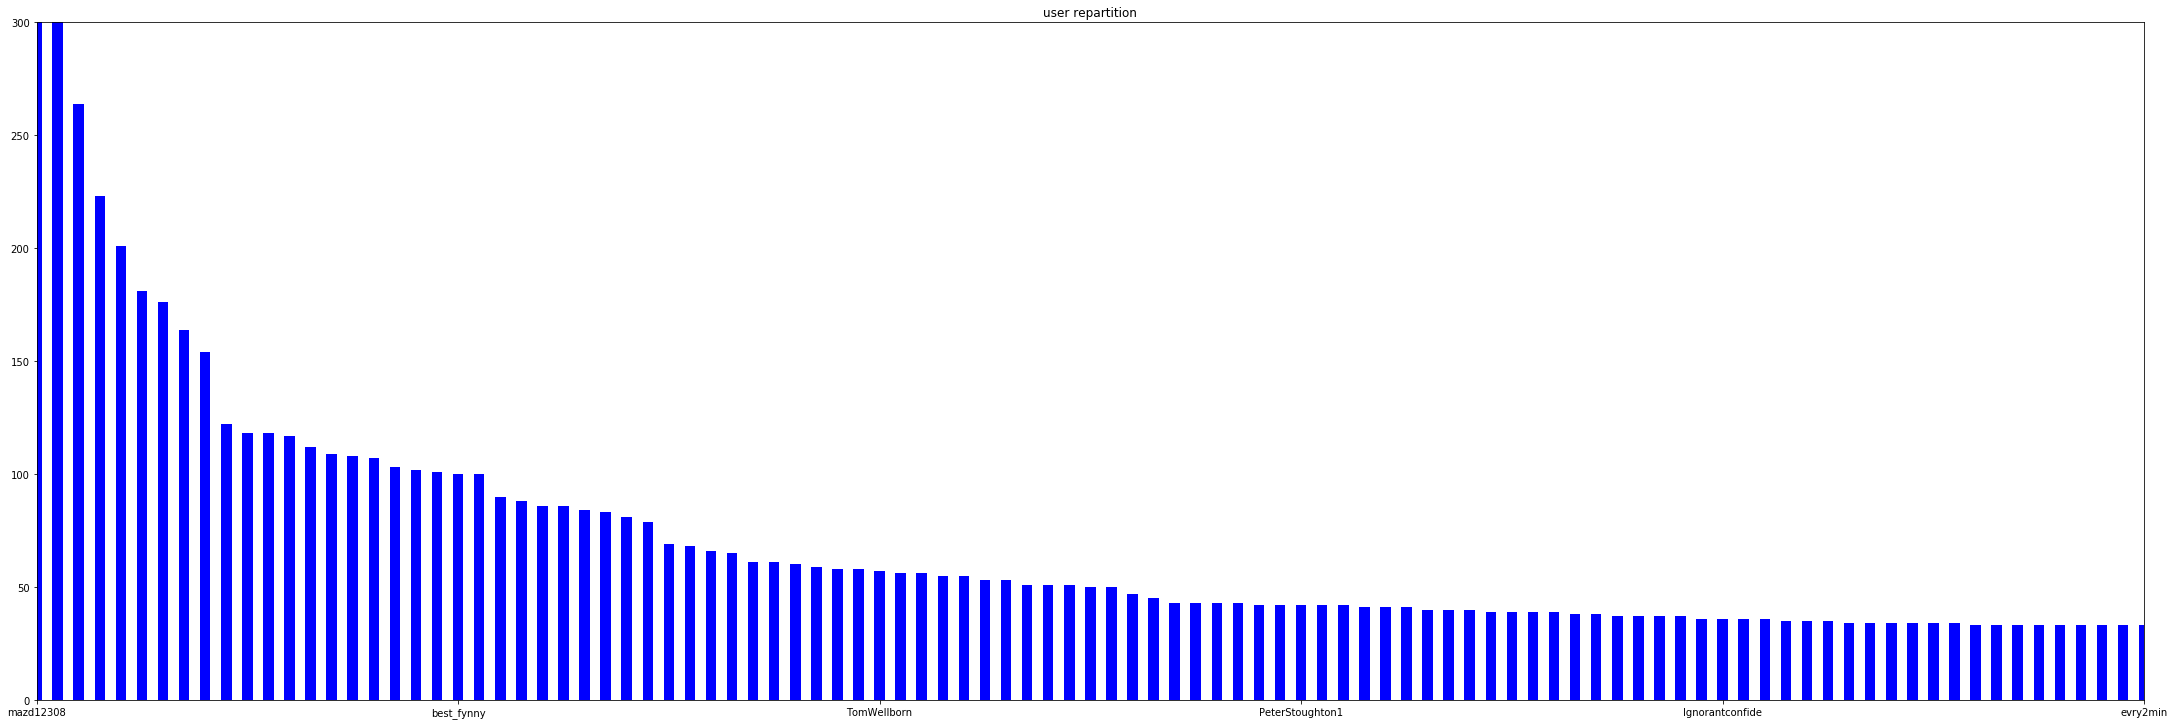

In [189]:
df_user_fr=tweet_by_user(df_fr)
df_user_en=tweet_by_user(df_en)

# Graph of the main distribution

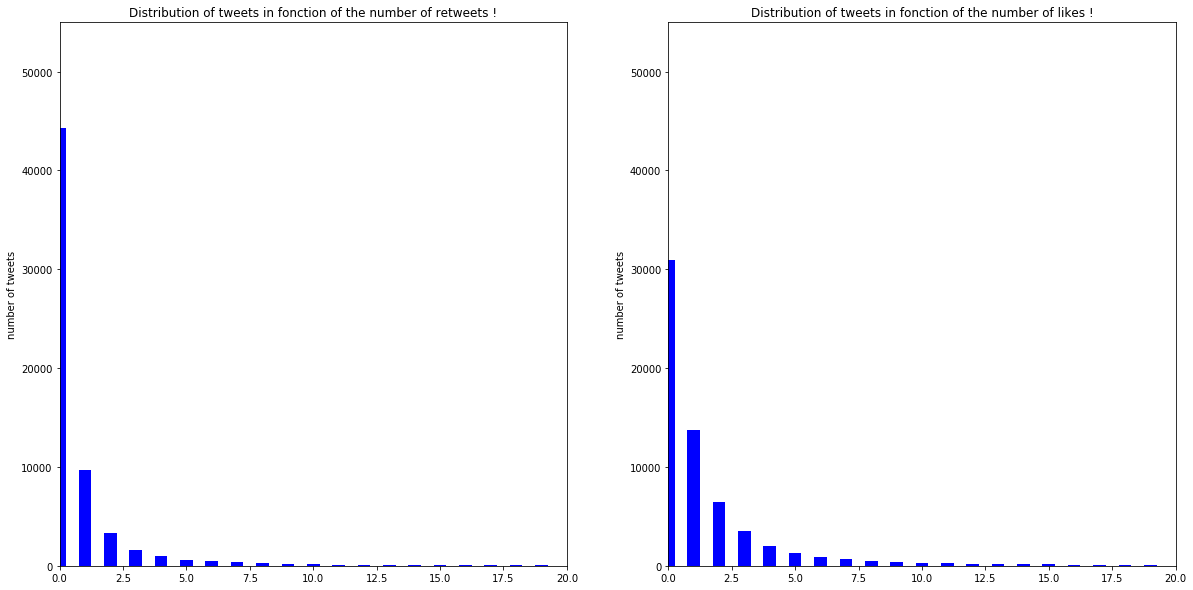

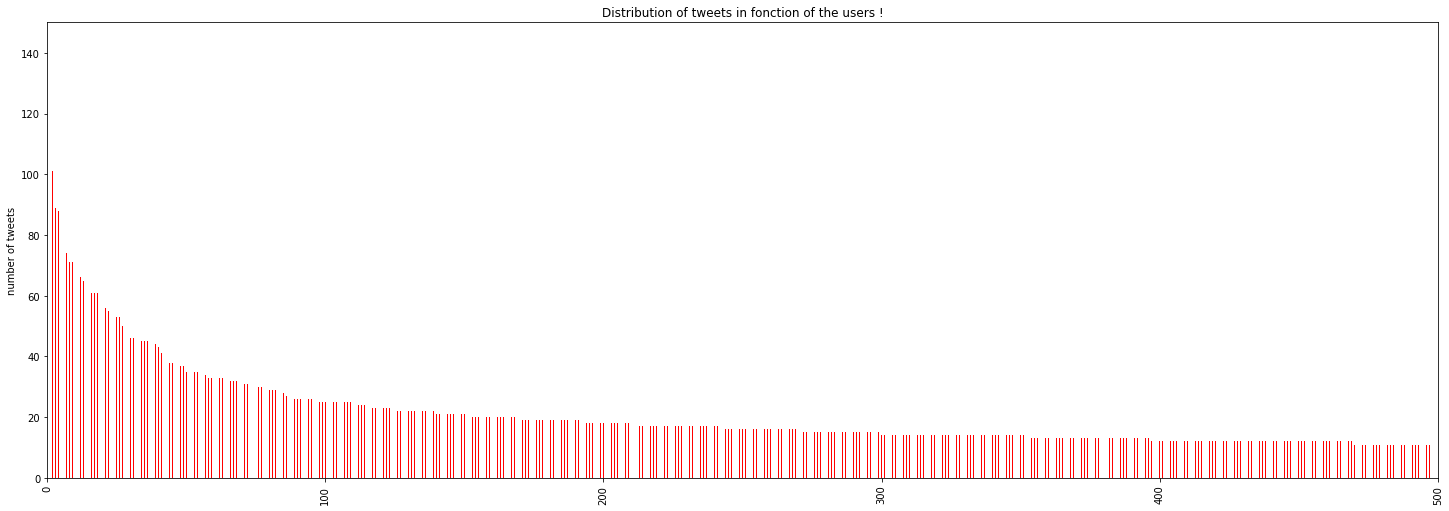

In [11]:
fig1 = plt.figure(figsize = (20, 10))

x = I[:20]
height = DT[:20]
width = 0.5
plt.tight_layout() #ajustement des etiquttes

plt.subplot(1,2,1) #fisrt graph
plt.bar(x, height, width, color='b')
plt.ylim(0,55000)
plt.xlim(0,20)
plt.ylabel('number of tweets')
plt.title('Distribution of tweets in fonction of the number of retweets !')


plt.subplot(1,2,2)#Second graphe
plt.bar(x,DL[:20], width, color='b')
plt.title('Distribution of tweets in fonction of the number of likes !')
plt.ylim(0,55000)
plt.xlim(0,20)

plt.ylabel('number of tweets')
plt.savefig('dristribution_retweetsBar.png')
plt.show()

fig2 = plt.figure(figsize = (20, 7))
ax = range(500)
height = DU[:500]
width = 0.2
plt.xticks(rotation=90)
plt.tight_layout() #ajustement des etiquttes
plt.bar(ax, height, width, color='r')
plt.ylim(0,150)
plt.xlim(0,500)
plt.ylabel('number of tweets')
plt.title('Distribution of tweets in fonction of the users !')
plt.savefig('dristribution_UserTweetsBar.png')
plt.show()


# Graph of temporal series

In [2]:
def time_distribution(tweet_df):
    pd.to_datetime(tweet_df['timestamp'])
    #Create a graph representing the activity of the campaign by day:
    df_D=tweet_df.set_index('timestamp').groupby(pd.TimeGrouper('D')).count().dropna()
    df_H=tweet_df.set_index('timestamp').groupby(pd.TimeGrouper('H')).count().dropna()
    
    times = pd.to_datetime(tweet_df['timestamp'])
    #print(times.dt.hour)
    df_H24=tweet_df.reset_index(drop=True).groupby([times.dt.hour]).count().dropna()
    ################ save and print in excel
    writer = pd.ExcelWriter('time_distribution_fr.xlsx')
    df_D.to_excel(writer,'day_distribution')
    df_H.to_excel(writer,'hour_distribution')
    df_H24.to_excel(writer,'h24_distribution')
    writer.save()
    ############## print in python
    
    dataD=df_D['text']
    dataH=df_H['text']
    dataH24=df_H24['text']
    
    NTD=[]
    NTH=[]
    NTH24=[]
    I=[]
    
    SNTH=[]

    for i in range(len(dataD)):
        NTD.append(dataD[i])
    for i in range(len(dataH)):
        NTH.append(dataH[i])
    
    for i in range(len(dataH24)):
        NTH24.append(dataH24.iloc[i])
        I.append(i)
    
    print(NTH24[:10]) 
    
    SNTH=[NTH[0]]
    for i in range(len(NTH)-1):
        SNTH.append(SNTH[i]+NTH[i+1])
    
#print(TD,data,NTD)
#print(tweet_df['timestamp'].groupby(tweet_df['timestamp'].dayofweek).count())
#tweet_df['hod'] = [t.hour for t in tweet_df['timestamp']]
#tweet_df['dow'] = [t.dayofweek for t in tweet_df['timestamp']]
#print(tweet_df.groupby(tweet_df['timestamp'].map(lambda x: x.day)).count())
#df.set_index('timestamp').groupby(pd.TimeGrouper('D')).count().dropna()['text']

    ###### figure 3
    fig3 = plt.figure(figsize = (20, 10))
    #date = data.index.date.astype('O')
    x = dataD.index.tolist()
    height = NTD
    width = 0.8
    plt.tight_layout() #ajustement des etiquttes
    plt.bar(x, height, width, color='b')
    plt.ylim(0,40000)
    plt.ylabel('number of tweets')
    plt.title('Distribution of tweets by day !')
    plt.show()
    
    #####figure 4
    fig4 = plt.figure(figsize = (20, 10))
    
    #date = data.index.date.astype('O')
    x = dataH.index.tolist()
    height = NTH
    width = 0.01
    plt.tight_layout() #ajustement des etiquttes
    
    plt.bar(x, height, width, color='g')
    plt.ylim(0,2000)
    
    plt.ylabel('number of tweets')
    plt.title('Distribution of tweets  by hour !')
    plt.show()
    print()
     #date = data.index.date.astype('O')
    #####figure 5  
    fig5 = plt.figure(figsize = (20, 10))
    #xlayout=[]
    #for i in range(len(dataH24.index.tolist())) :
    #    t=dataH24.index.tolist()[i]
    #    xlayout.append(str(t[0])+'h'+str(t[1])+'min')
    ##print(x)
    x= dataH24.index.tolist()
    #np.array(range(1,len(dataH24)))
    height = NTH24
    width = 0.8
    plt.tight_layout() #ajustement des etiquttes
    
    plt.bar(x, height, width, color='g')
    plt.ylim(0,10000)
    
    plt.ylabel('number of tweets')
    plt.title('Distribution of tweets  for each hour !')
    plt.show()
    
    #####figure 6
    fig6 = plt.figure(figsize = (20, 10))
    
    #date = data.index.date.astype('O')
    x = dataH.index.tolist()
    height = SNTH
    width = 0.01
    plt.tight_layout() #ajustement des etiquttes
    
    plt.bar(x, height, width, color='g')
    plt.ylim(0,150000)
    
    plt.ylabel('number of tweets')
    plt.title('Cumulative distribution of tweets  by hour !')
    plt.show()

[788, 511, 449, 408, 725, 1532, 2242, 3205, 3923, 4261]


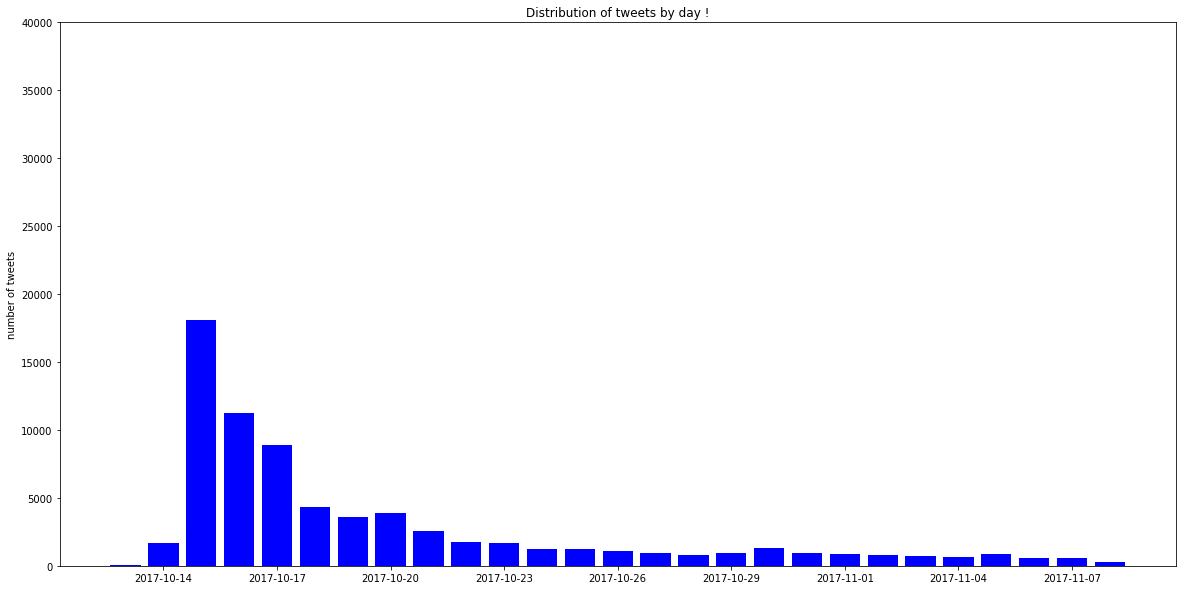

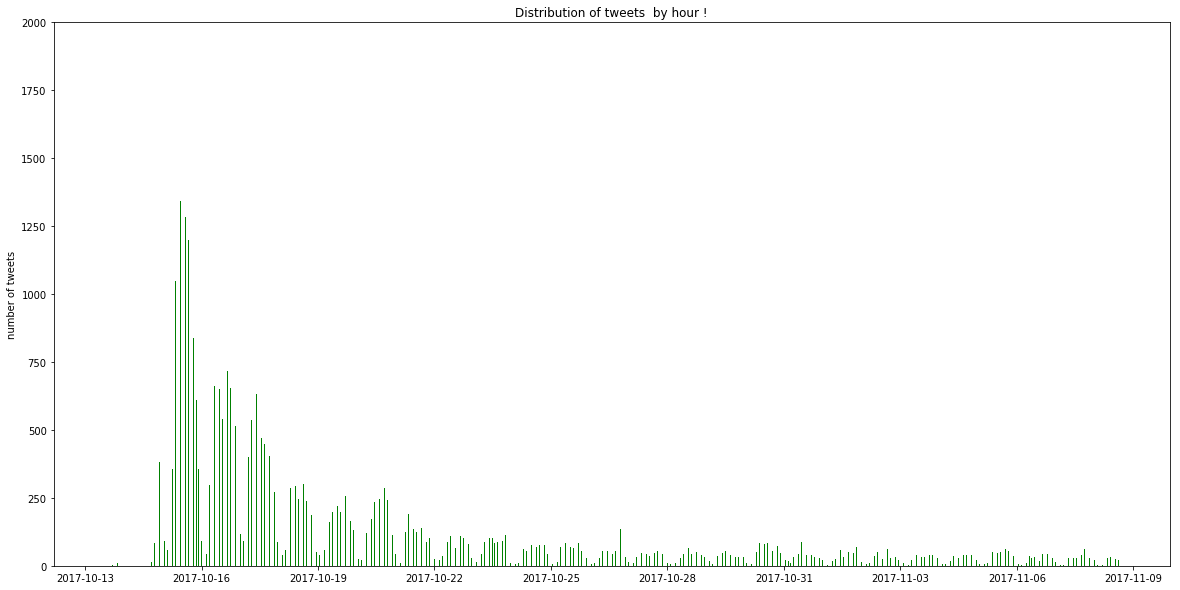

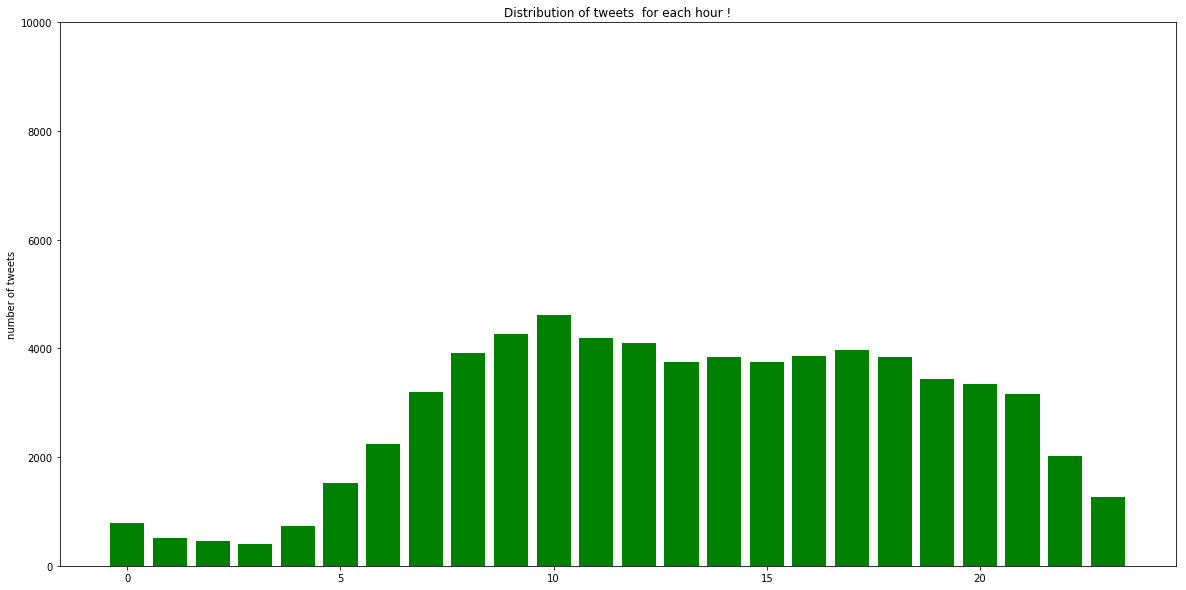

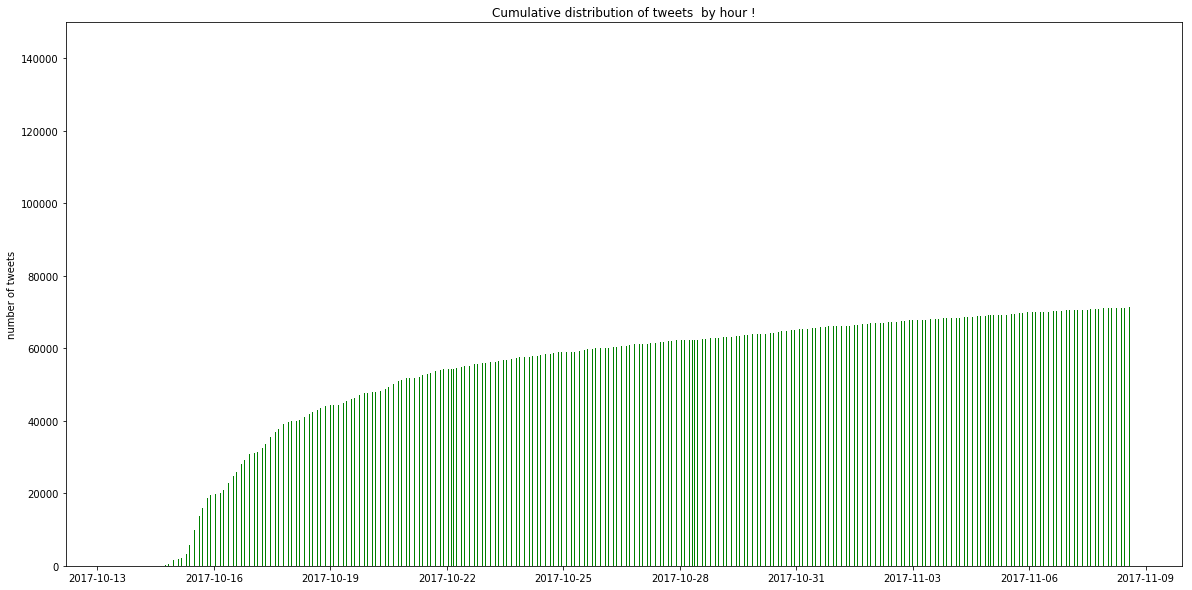

In [5]:
#time_distribution(df_fr)
#time_distribution(df_en)
time_distribution(df_fr)